In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import seaborn as sns
import pprint
import tensorflow as tf
from keras.models import save_model, load_model

Using TensorFlow backend.
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
datos = pd.read_csv('consumo_por_dia.csv')

In [16]:
x = datos['Energia [kWh]'].values
y = datos['Horas Insolacion (h)'].values

In [22]:
Ellipse((x,y),width = 1000,height=10)

In [70]:
def confidence_ellipse(x, y, ax, n_std=2.2, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

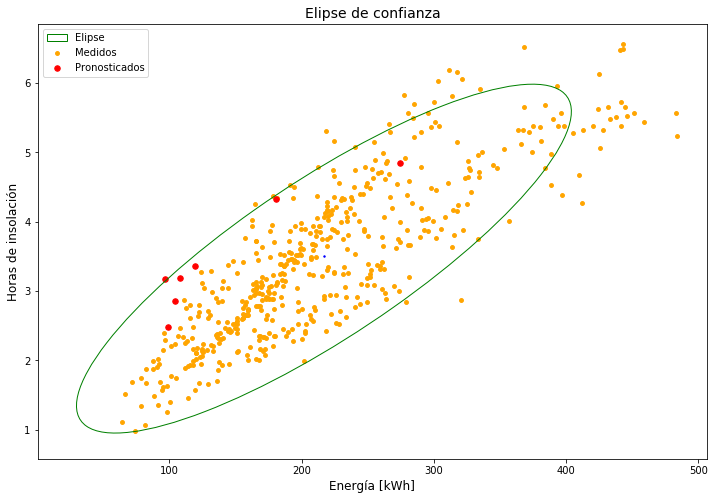

In [95]:
PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],

}
mu = 216.8,3.5
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
machete_X = [119.7054136,96.540434,98.97505536,107.8210296,180.4421894,103.9653913,274.1067239]
machete_Y = [ 3.36,3.17557,2.48504,3.18886,4.32832,2.85743,4.85288]
ax.scatter(x, y,c ='orange',s=15)
ax.scatter(machete_X,machete_Y,s = 30,c= 'red')
confidence_ellipse(x, y, ax, edgecolor='green')

ax.scatter(mu[0], mu[1], c='blue', s=2)
ax.set_title('Elipse de confianza', fontsize= 14)
ax.set_xlabel('Energía [kWh]',fontsize = 12)
ax.set_ylabel('Horas de insolación',fontsize = 12)
plt.legend(('Elipse','Medidos','Pronosticados'))

plt.show()